### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Create Main Data Frame

In [3]:
df_main = pd.read_csv('tmdb-movies.csv')
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Question 1

In [4]:
# Add net income to df_main
df_main['net_income'] = df_main['revenue'] - df_main['budget']

# Create new data frame
df_years = df_main[['release_year', 'popularity', 'runtime', 'vote_count', 'vote_average', 'budget', 'revenue', 'net_income']]

# Group new data frame by year
group_avg_years = df_years.groupby(['release_year']).mean()

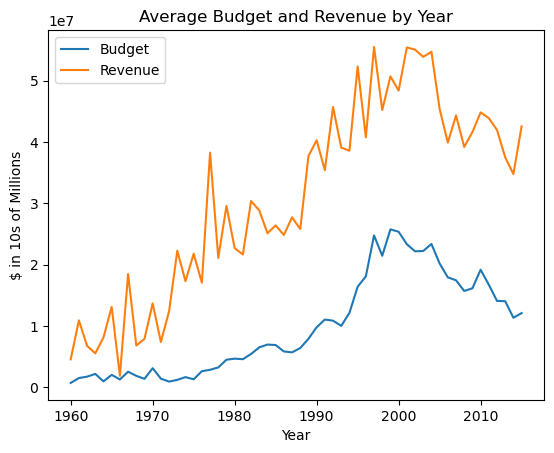

In [5]:
plt.plot(group_avg_years['budget']);
plt.plot(group_avg_years['revenue']);
plt.title('Average Budget and Revenue by Year')
plt.xlabel('Year')
plt.ylabel('$ in 10s of Millions')
plt.legend(['Budget', 'Revenue'])

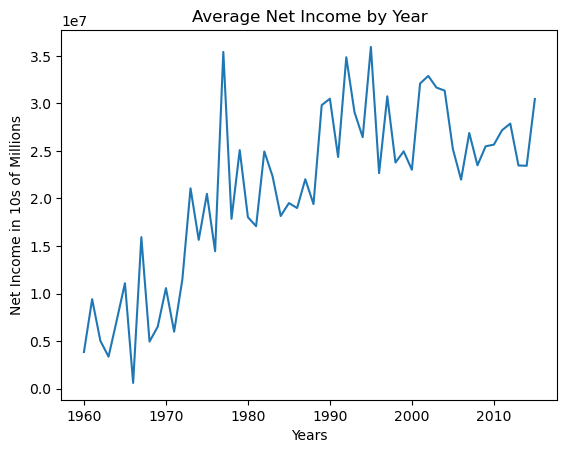

In [6]:
plt.plot(group_avg_years['net_income']);
plt.title('Average Net Income by Year');
plt.xlabel('Years');
plt.ylabel('Net Income in 10s of Millions');

Text(0, 0.5, 'Revenue in billions')

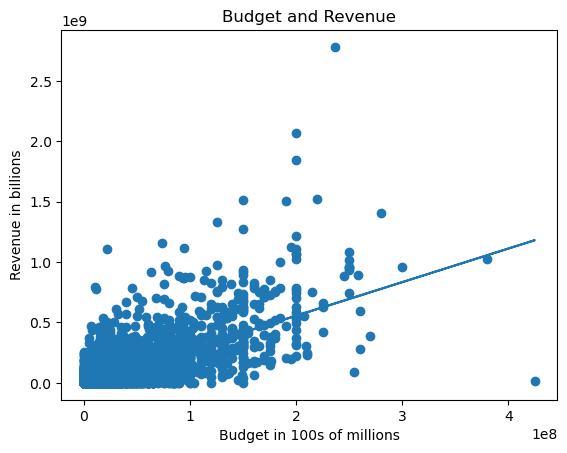

In [7]:
x = df_main['budget']
y = df_main['revenue']
plt.scatter(x, y);

# calculate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# plot trendline
plt.plot(x, p(x));
plt.title('Budget and Revenue')
plt.xlabel('Budget in 100s of millions')
plt.ylabel('Revenue in billions')

Text(0, 0.5, 'Net income in billions')

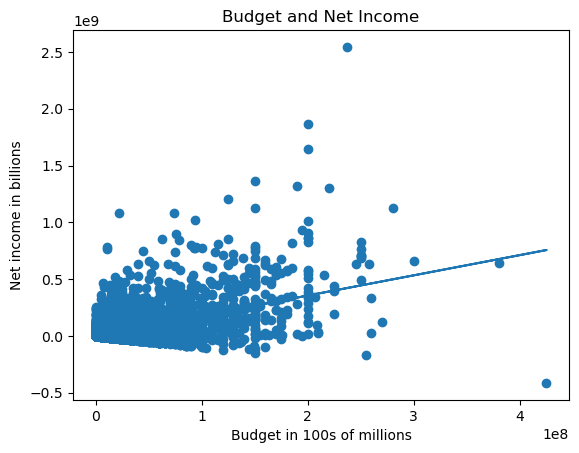

In [8]:
x = df_main['budget']
y = df_main['net_income']
plt.scatter(x, y);

# calculate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# plot trendline
plt.plot(x, p(x));
plt.title('Budget and Net Income')
plt.xlabel('Budget in 100s of millions')
plt.ylabel('Net income in billions')

Text(0, 0.5, 'Net Income in billions')

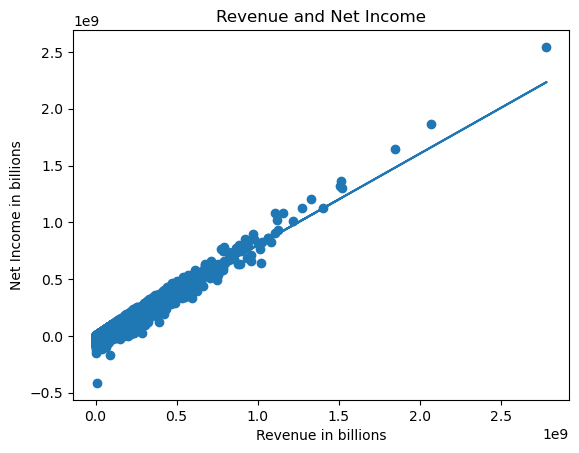

In [9]:
x = df_main['revenue']
y = df_main['net_income']
plt.scatter(x, y);

# calculate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# plot trendline
plt.plot(x, p(x));
plt.title('Revenue and Net Income')
plt.xlabel('Revenue in billions')
plt.ylabel('Net Income in billions')

Text(0, 0.5, 'Runtime in minutes')

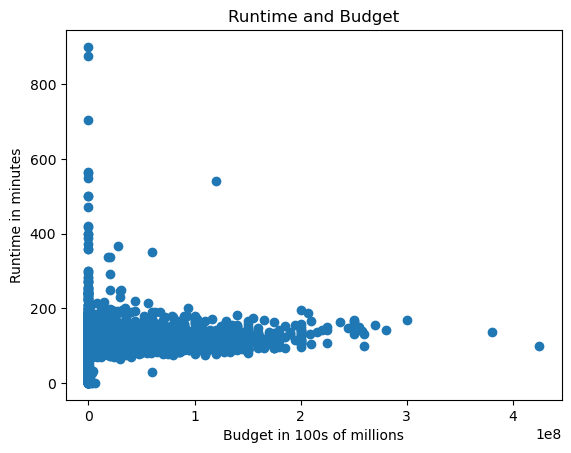

In [10]:
x = df_main['budget']
y = df_main['runtime']
plt.scatter(x, y);
plt.title('Runtime and Budget')
plt.xlabel('Budget in 100s of millions')
plt.ylabel('Runtime in minutes')

Text(0, 0.5, 'Runtime in minutes')

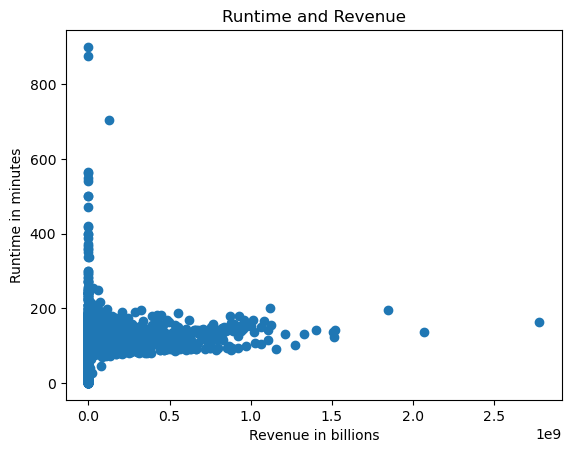

In [11]:
x = df_main['revenue']
y = df_main['runtime']
plt.scatter(x, y);
plt.title('Runtime and Revenue')
plt.xlabel('Revenue in billions')
plt.ylabel('Runtime in minutes')

Text(0, 0.5, 'average rating')

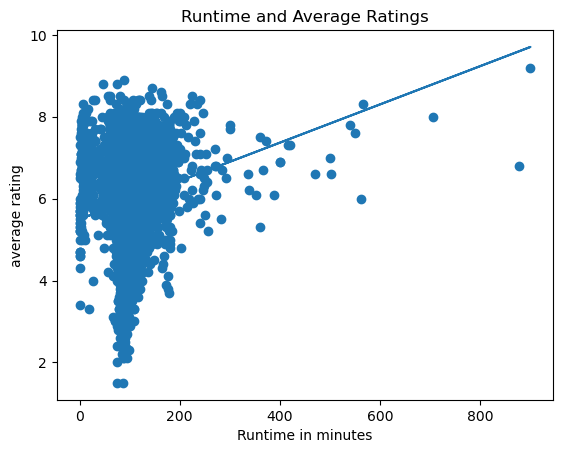

In [13]:
x = df_main['runtime']
y = df_main['vote_average']
plt.scatter(x, y);

# calculate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# plot trendline
plt.plot(x, p(x));
plt.title('Runtime and Average Ratings')
plt.xlabel('Runtime in minutes')
plt.ylabel('average rating')

<Axes: xlabel='Total revenue in billions', ylabel='Director'>

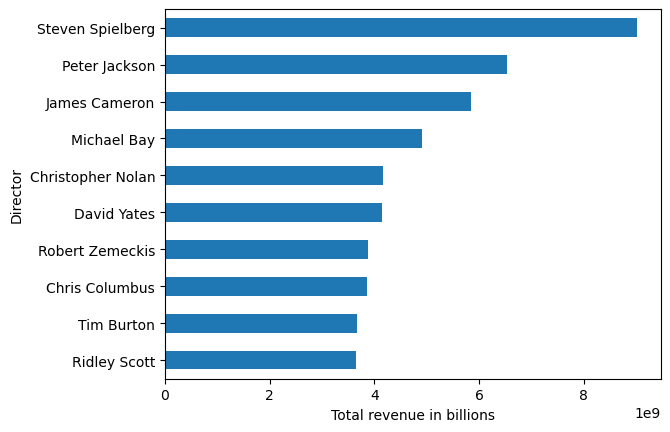

In [14]:
top_rev_directors = df_main.groupby('director')['revenue'].sum().nlargest(10).sort_values()
top_rev_directors.plot(kind='barh',ylabel="Director", xlabel="Total revenue in billions")
